# Dealing with Categorical Variables - Lab

## Introduction
In this lab, you'll explore the Boston Housing dataset for categorical variables, and you'll transform your data so you'll be able to use categorical data as predictors!

## Objectives
You will be able to:
* Identify and inspect the categorical variables in the Boston housing dataset 
* Categorize inputs that aren't categorical 
* Create new datasets with dummy variables  

## Importing the Boston Housing dataset

Let's start by importing the Boston Housing dataset. This dataset is available in Scikit-Learn, and can be imported by running the cell below: 

In [146]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

If you'll inspect `boston` now, you'll see that this basically returns a dictionary. Let's have a look at what exactly is stored in the dictionary by looking at the dictionary keys: 

In [147]:
# Print boston
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [148]:
# Look at the keys
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Let's create a Pandas DataFrame with the data (which are the features, **not including the target**) and the feature names as column names.

In [149]:
boston_features = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


Now look at the first five rows of `boston_features`:  

In [150]:
# Inspect the first few rows
boston_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


For your reference, we copied the attribute information below. Additional information can be found here: http://scikit-learn.org/stable/datasets/index.html#boston-dataset
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per $10,000
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population

Recall that the values corresponding to the data key are the features. The target is not included. For this dataset, the target is the median value of owner-occupied homes in $1000s and the values can be accessed using the target key. Using the target key, convert the target to a separate DataFrame and set `'MEDV'` as the column name.

In [151]:
boston_target = pd.DataFrame(boston.target, columns=['MEDV'])
boston_target.head()

# Inspect the first few rows


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


The target is described as: 
- MEDV: Median value of owner-occupied homes in $1000s

Next, let's merge the target and the predictors in one DataFrame `boston_df`: 

In [152]:
boston_df = pd.concat([boston_features, boston_target], axis=1)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Let's inspect these 13 features using `.describe()` and `.info()`

In [153]:
# Use .describe()
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [154]:
# Use .info()
boston_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


Now, take a look at the scatter plots for each predictor with the target on the y-axis.

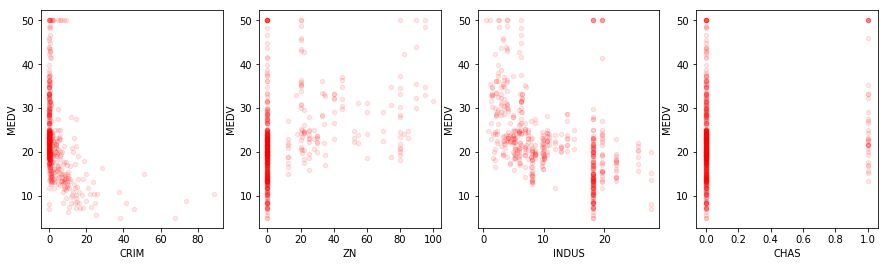

In [155]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create scatter plots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,4))

for xcol, ax in zip(list(boston_features)[:4], axes):
    boston_df.plot(kind='scatter', x=xcol, y='MEDV', ax=ax, alpha=0.1, color='red')

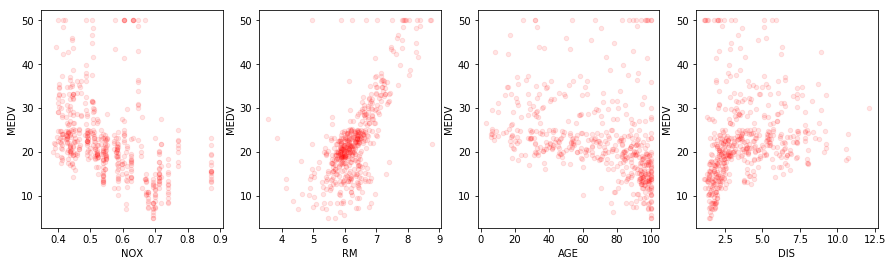

In [156]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,4))

for xcol, ax in zip(list(boston_features)[4:8], axes):
    boston_df.plot(kind='scatter', x=xcol, y='MEDV', ax=ax, alpha=0.1, color='red')

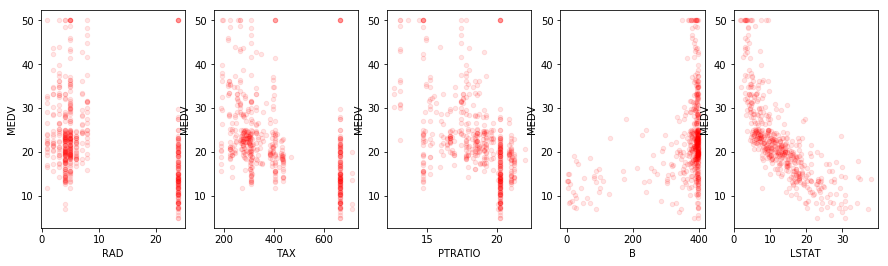

In [157]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15,4))

for xcol, ax in zip(list(boston_features)[8:], axes):
    boston_df.plot(kind='scatter', x=xcol, y='MEDV', ax=ax, alpha=0.1, color='red')

## To categorical: binning

If you created your scatterplots correctly, you'll notice that except for `CHAS` (the Charles River Dummy variable), there is clearly no categorical data. You will have seen though that `RAD` and `TAX` have more of a vertical-looking structure like the one seen in the lesson, and that there is less of a "cloud"-looking structure compared to most other variables. It is difficult to justify a linear pattern between predictor and target here. In this situation, it might make sense to restructure data into bins so that they're treated as categorical variables. We'll start by showing how this can be done for `RAD` and then it's your turn to do this for `TAX`.

### RAD

Look at the structure of `RAD` to decide how to create your bins. 

In [158]:
# Your code here
boston_df.RAD.describe()

count    506.000000
mean       9.549407
std        8.707259
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: RAD, dtype: float64

In [159]:
# First, create bins based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]

# Use pd.cut()
bins_rad = pd.cut(boston_df.RAD, bins)

In [160]:
# Using pd.cut() returns unordered categories. Transform this to ordered categories 
bins_rad = bins_rad.cat.as_ordered()
bins_rad

0       (0, 3]
1       (0, 3]
2       (0, 3]
3       (0, 3]
4       (0, 3]
5       (0, 3]
6       (4, 5]
7       (4, 5]
8       (4, 5]
9       (4, 5]
10      (4, 5]
11      (4, 5]
12      (4, 5]
13      (3, 4]
14      (3, 4]
15      (3, 4]
16      (3, 4]
17      (3, 4]
18      (3, 4]
19      (3, 4]
20      (3, 4]
21      (3, 4]
22      (3, 4]
23      (3, 4]
24      (3, 4]
25      (3, 4]
26      (3, 4]
27      (3, 4]
28      (3, 4]
29      (3, 4]
        ...   
476    (5, 24]
477    (5, 24]
478    (5, 24]
479    (5, 24]
480    (5, 24]
481    (5, 24]
482    (5, 24]
483    (5, 24]
484    (5, 24]
485    (5, 24]
486    (5, 24]
487    (5, 24]
488     (3, 4]
489     (3, 4]
490     (3, 4]
491     (3, 4]
492     (3, 4]
493    (5, 24]
494    (5, 24]
495    (5, 24]
496    (5, 24]
497    (5, 24]
498    (5, 24]
499    (5, 24]
500    (5, 24]
501     (0, 3]
502     (0, 3]
503     (0, 3]
504     (0, 3]
505     (0, 3]
Name: RAD, Length: 506, dtype: category
Categories (4, interval[int64]): [(0, 3] < (3

In [161]:
bins_rad.describe()

count         506
unique          4
top       (5, 24]
freq          199
Name: RAD, dtype: object

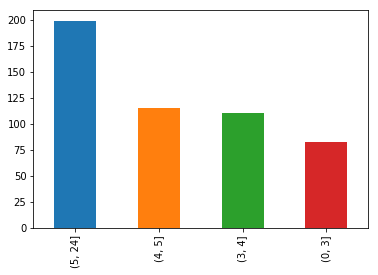

In [162]:
# Inspect the result
bins_rad.value_counts().plot(kind='bar');

In [163]:
# Replace the existing 'RAD' column
boston_df.RAD = bins_rad
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,"(0, 3]",296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,"(0, 3]",242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,"(0, 3]",242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,"(0, 3]",222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,"(0, 3]",222.0,18.7,396.90,5.33,36.2


### TAX

Split the `TAX` column up in 5 categories. You can chose the bins as desired but make sure they're pretty well-balanced.

In [164]:
# Repeat everything for "TAX"
boston_df.TAX.describe()

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64

## Perform label encoding 

In [165]:
# Perform label encoding and replace in boston_df
bins = [187, 250, 300, 400, 550, 711]

# Use pd.cut()
bins_tax = pd.cut(boston_df.TAX, bins)

In [166]:
# Inspect first few columns
bins_tax = bins_tax.cat.as_ordered()
bins_tax

0      (250, 300]
1      (187, 250]
2      (187, 250]
3      (187, 250]
4      (187, 250]
5      (187, 250]
6      (300, 400]
7      (300, 400]
8      (300, 400]
9      (300, 400]
10     (300, 400]
11     (300, 400]
12     (300, 400]
13     (300, 400]
14     (300, 400]
15     (300, 400]
16     (300, 400]
17     (300, 400]
18     (300, 400]
19     (300, 400]
20     (300, 400]
21     (300, 400]
22     (300, 400]
23     (300, 400]
24     (300, 400]
25     (300, 400]
26     (300, 400]
27     (300, 400]
28     (300, 400]
29     (300, 400]
          ...    
476    (550, 711]
477    (550, 711]
478    (550, 711]
479    (550, 711]
480    (550, 711]
481    (550, 711]
482    (550, 711]
483    (550, 711]
484    (550, 711]
485    (550, 711]
486    (550, 711]
487    (550, 711]
488    (550, 711]
489    (550, 711]
490    (550, 711]
491    (550, 711]
492    (550, 711]
493    (300, 400]
494    (300, 400]
495    (300, 400]
496    (300, 400]
497    (300, 400]
498    (300, 400]
499    (300, 400]
500    (30

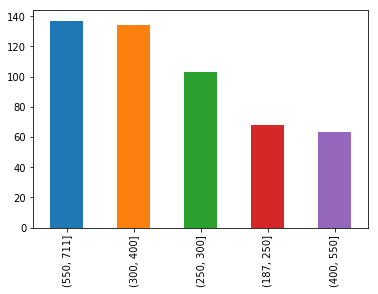

In [167]:
bins_tax.value_counts().plot(kind='bar');

In [168]:
boston_df.TAX = bins_tax
bins_tax.describe()

count            505
unique             5
top       (550, 711]
freq             137
Name: TAX, dtype: object

In [169]:
boston_df.RAD = boston_df.RAD.cat.codes
boston_df.TAX = boston_df.TAX.cat.codes

In [170]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,0,1,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,0,0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,0,0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,0,0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,0,0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,0,0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,2,2,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,2,2,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,2,2,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,2,2,15.2,386.71,17.10,18.9


## Create dummy variables

Create dummy variables, and make sure their column names contain `'TAX'` and `'RAD'` remembering to drop the first. Add the new dummy variables to `boston_df` and remove the old `'TAX'` and `'RAD'` columns.

In [171]:
# Create dummpy variables for TAX and RAD columns
rad_dummy = pd.get_dummies(bins_rad, prefix = 'RAD', drop_first=True)
tax_dummy = pd.get_dummies(bins_tax, prefix = 'TAX', drop_first=True)

In [172]:
boston_df = boston_df.drop(['RAD', 'TAX'], axis=1)

In [173]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,18.7,396.90,5.33,36.2


In [174]:
boston_df = pd.concat([boston_df, rad_dummy, tax_dummy], axis=1)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,MEDV,"RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(250, 300]","TAX_(300, 400]","TAX_(400, 550]","TAX_(550, 711]"
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,15.3,396.90,4.98,24.0,0,0,0,1,0,0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,17.8,396.90,9.14,21.6,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,17.8,392.83,4.03,34.7,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,18.7,394.63,2.94,33.4,0,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,18.7,396.90,5.33,36.2,0,0,0,0,0,0,0
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,18.7,394.12,5.21,28.7,0,0,0,0,0,0,0
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,15.2,395.60,12.43,22.9,0,1,0,0,1,0,0
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,15.2,396.90,19.15,27.1,0,1,0,0,1,0,0
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,15.2,386.63,29.93,16.5,0,1,0,0,1,0,0
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,15.2,386.71,17.10,18.9,0,1,0,0,1,0,0


Note how you end up with 19 columns now!

## Summary

In this lab, you practiced your knowledge of categorical variables on the Boston Housing dataset!